In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436603

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436603

In [9]:
model = keras.models.load_model('modelos/modeloGeneral_completo/vanilla_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436603

13644/13644 [==============================] - 134s 10ms/step


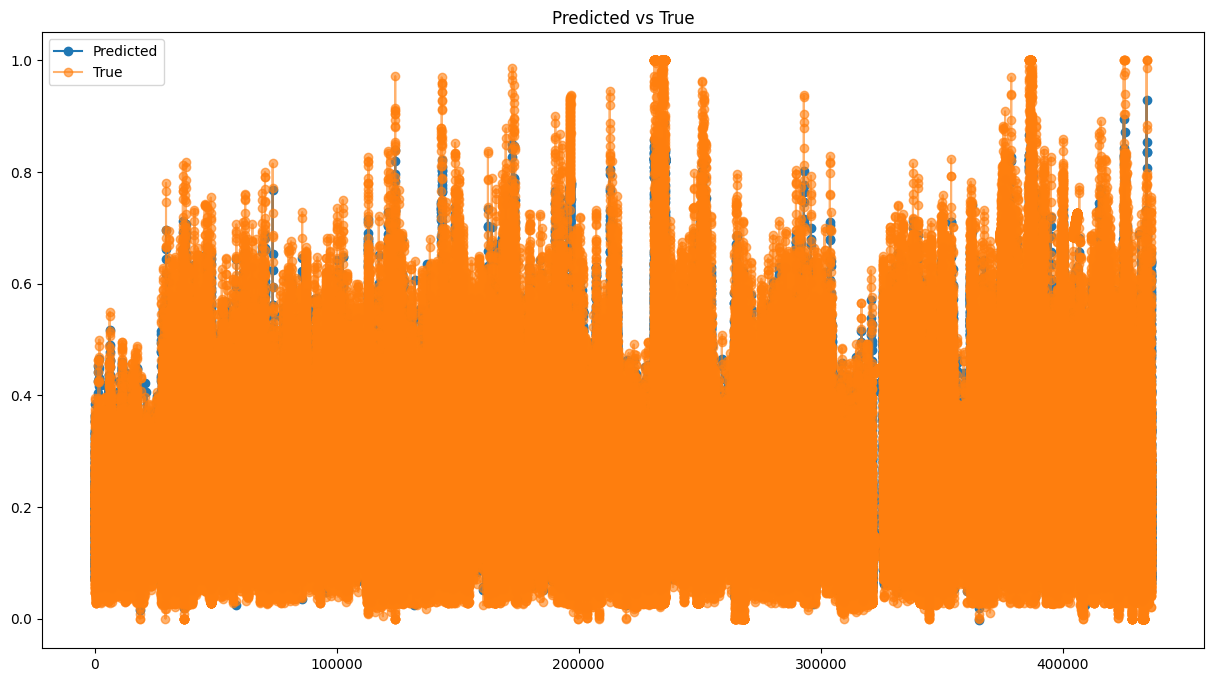

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.021530610097145204,
 'mse': 0.028921413329899913,
 'rmse': 0.0008364481489989124}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          137.841660
1          136.257141
2          136.595901
3          135.095398
4          144.297409
...               ...
436598     120.117142
436599     149.835358
436600     196.336960
436601     199.020447
436602     225.351624

[436603 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436598          137.0
436599          177.0
436600          198.0
436601          216.0
436602          233.0

[436603 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  137.841660
2023-01-01 00:15:00   140.0  136.257141
2023-01-01 00:30:00   139.0  136.595901
2023-01-01 00:45:00   145.0  135.095398
2023-01-01 01:00:00   159.0  144.297409
...                     ...         ...
2035-06-14 21:30:00   137.0  120.117142
2035-06-14 21:45:00   177.0  149.835358
2035-06-14 22:00:00   198.0  196.336960
2035-06-14 22:15:00   216.0  199.020447
2035-06-14 22:30:00   233.0  225.351624

[436603 rows x 2 columns]

AP, BE, EP: (0.9724256874682204, 0.009690748095519489, 0.017883564436260026)


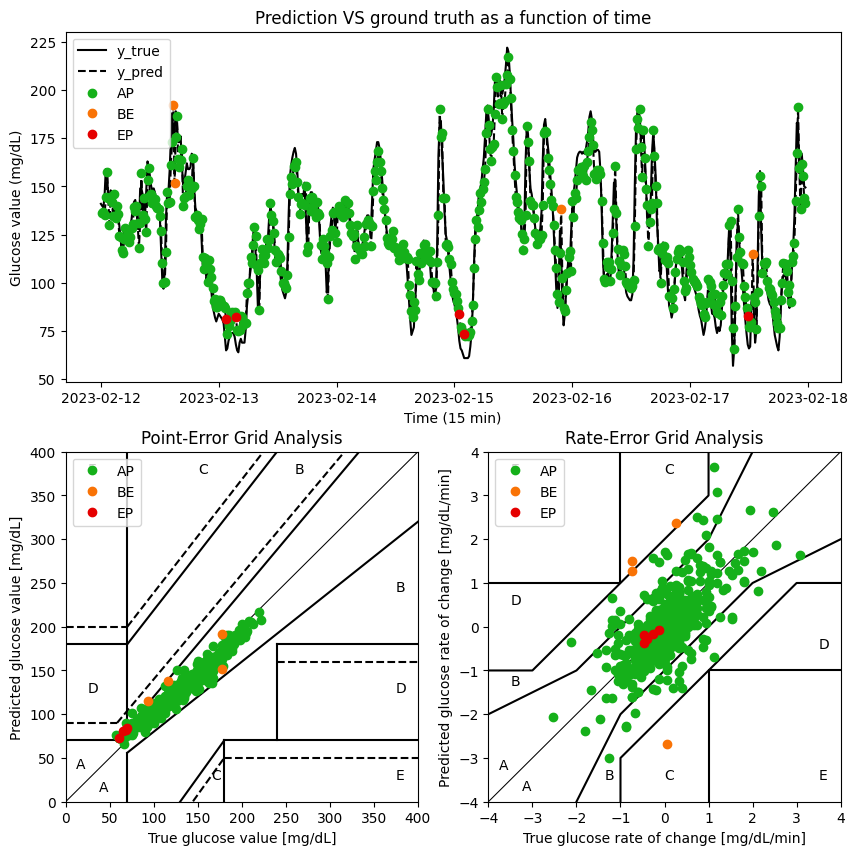

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-12 00:00:00   141.0  137.841660       NaN       NaN    NaN   
1      2023-02-12 00:15:00   140.0  136.257141 -0.066667 -0.105635     AP   
2      2023-02-12 00:30:00   139.0  136.595901 -0.066667  0.022584     AP   
3      2023-02-12 00:45:00   145.0  135.095398  0.400000 -0.100034     AP   
4      2023-02-12 01:00:00   159.0  144.297409  0.933333  0.613467     AP   
...                    ...     ...         ...       ...       ...    ...   
436598 2035-07-26 21:30:00   137.0  120.117142  2.333333  1.841882     AP   
436599 2035-07-26 21:45:00   177.0  149.835358  2.666667  1.981214     AP   
436600 2035-07-26 22:00:00   198.0  196.336960  1.400000  3.100107     AP   
436601 2035-07-26 22:15:00   216.0  199.020447  1.200000  0.178899     AP   
436602 2035-07-26 22:30:00   233.0  225.351624  1.133333  1.755412     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436598     A     A  
436599     A     A  
436600     A     B  
436601     A     B  
436602     A     A  

[436603 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 39ms/step


Glucose level Predict  Glucose level True
0               0.212699            0.219565
1               0.209255            0.217391

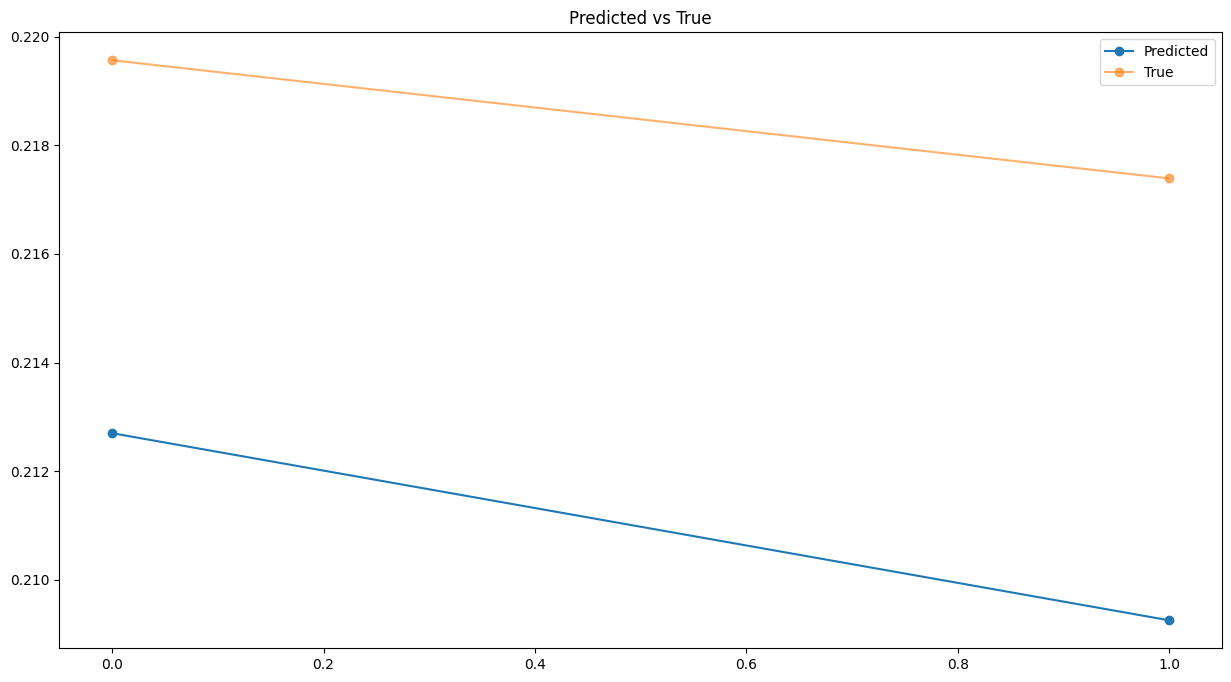

{'mae': 0.007501332397046312,
 'mse': 0.007528189541482736,
 'rmse': 5.667363777249004e-05}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             137.841644               141.0
1             136.257126               140.0

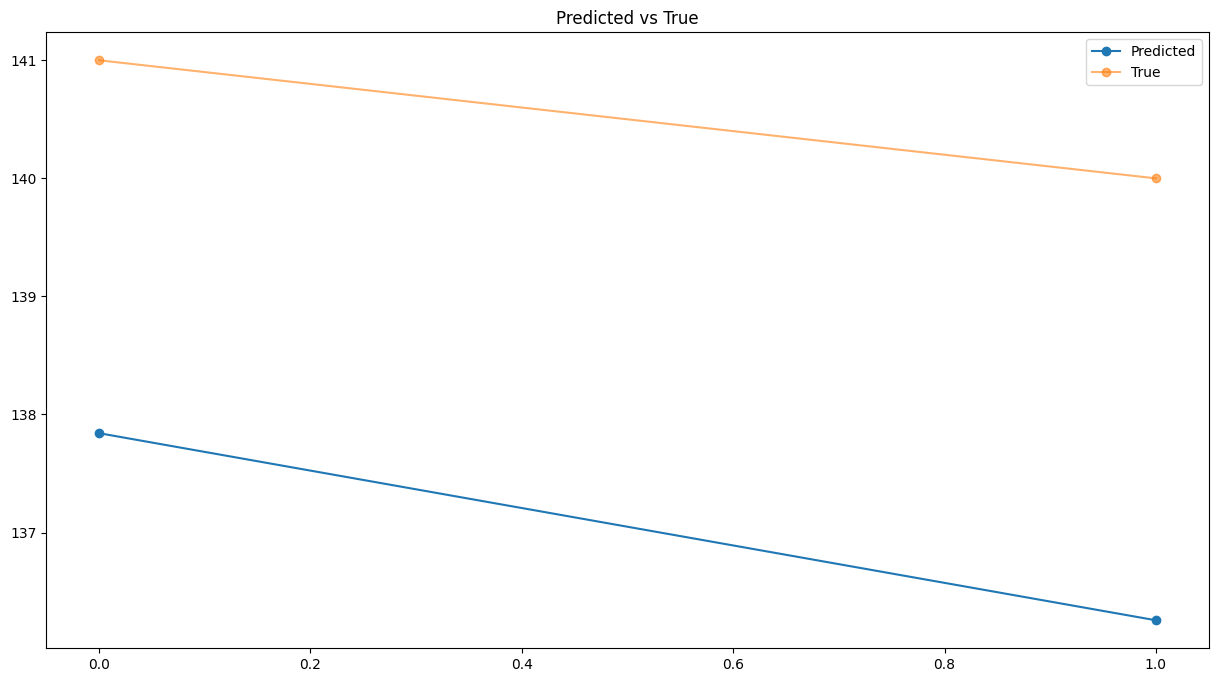

{'mae': 3.4506149291992188,
 'mse': 3.4629696561087338,
 'rmse': 11.992158839129843}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 37ms/step


Glucose level Predict  Glucose level True
0               0.212699            0.219565
1               0.194405            0.217391

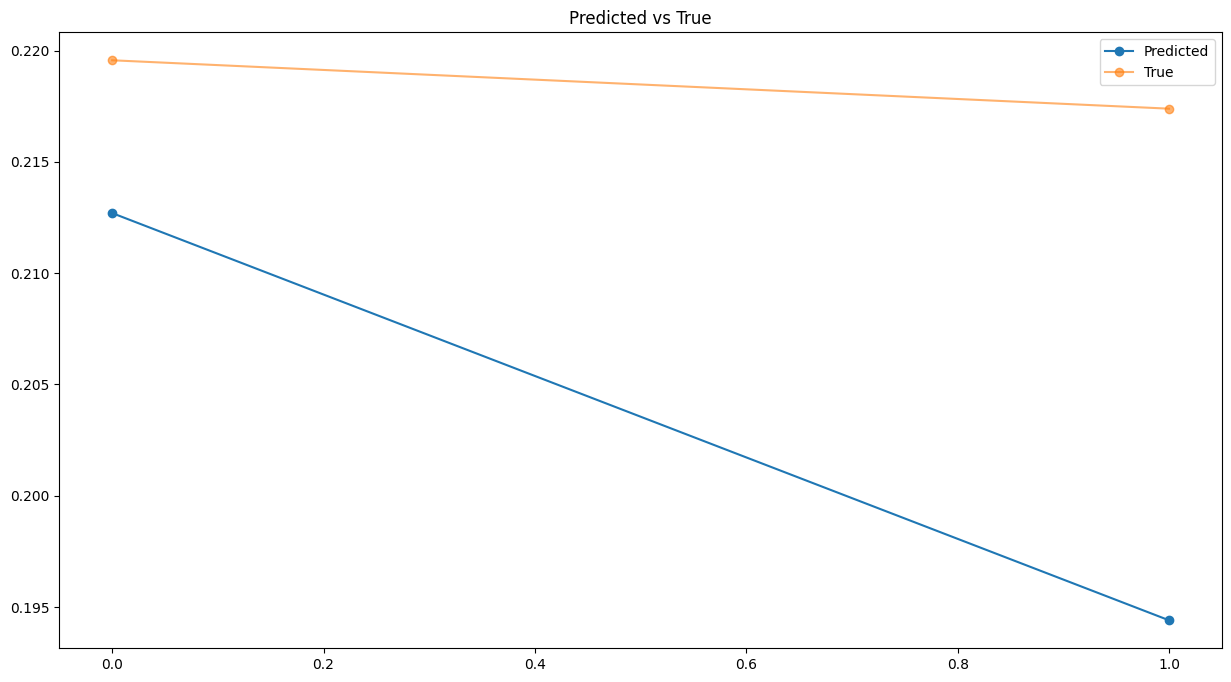

{'mae': 0.014925955171170457,
 'mse': 0.016963115595087345,
 'rmse': 0.0002877472906922955}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             137.841660               141.0
1             129.426483               140.0

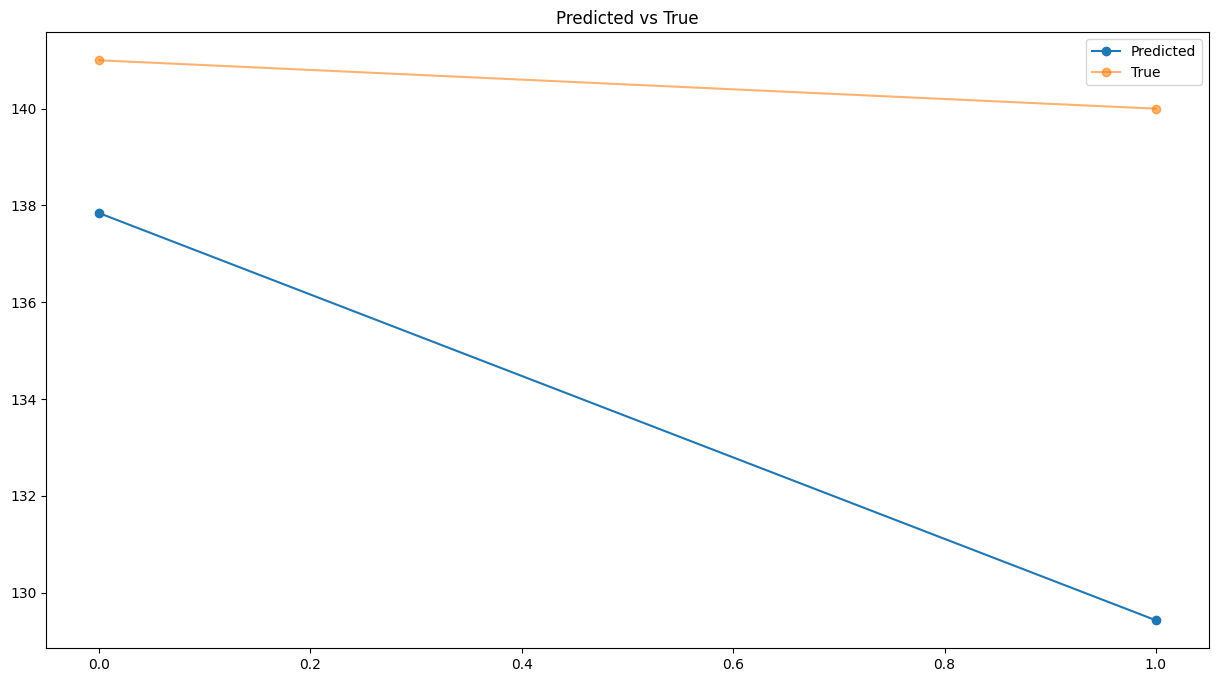

{'mae': 6.865928649902344, 'mse': 7.803024186505583, 'rmse': 60.88718645519111}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 6ms/step


Glucose level Predict  Glucose level True
0               0.215621            0.182609
1               0.155717            0.154348
2               0.157924            0.152174
3               0.158418            0.150000
4               0.152963            0.123913

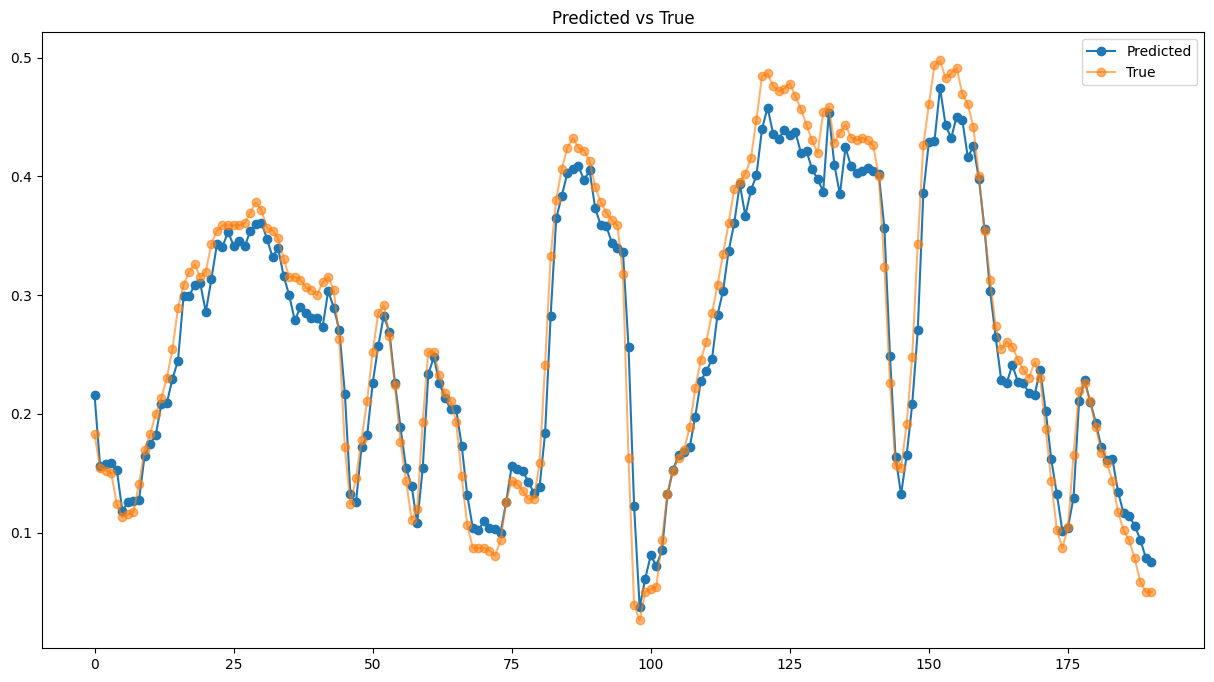

{'mae': 0.021059043032146663,
 'mse': 0.026020351280525576,
 'rmse': 0.0006770586807619489}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

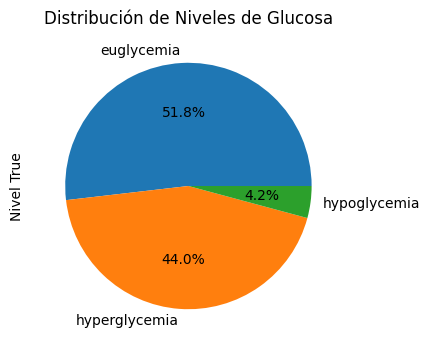

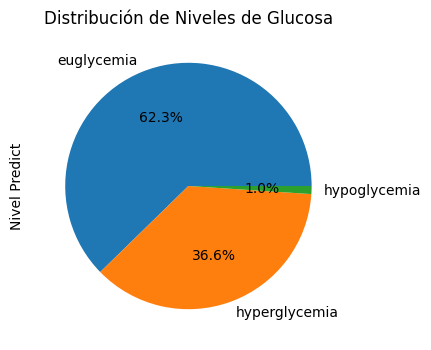

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             139.185791    euglycemia
1               111.0  euglycemia             111.629608    euglycemia
2               110.0  euglycemia             112.645081    euglycemia
3               109.0  euglycemia             112.872467    euglycemia
4                97.0  euglycemia             110.362930    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


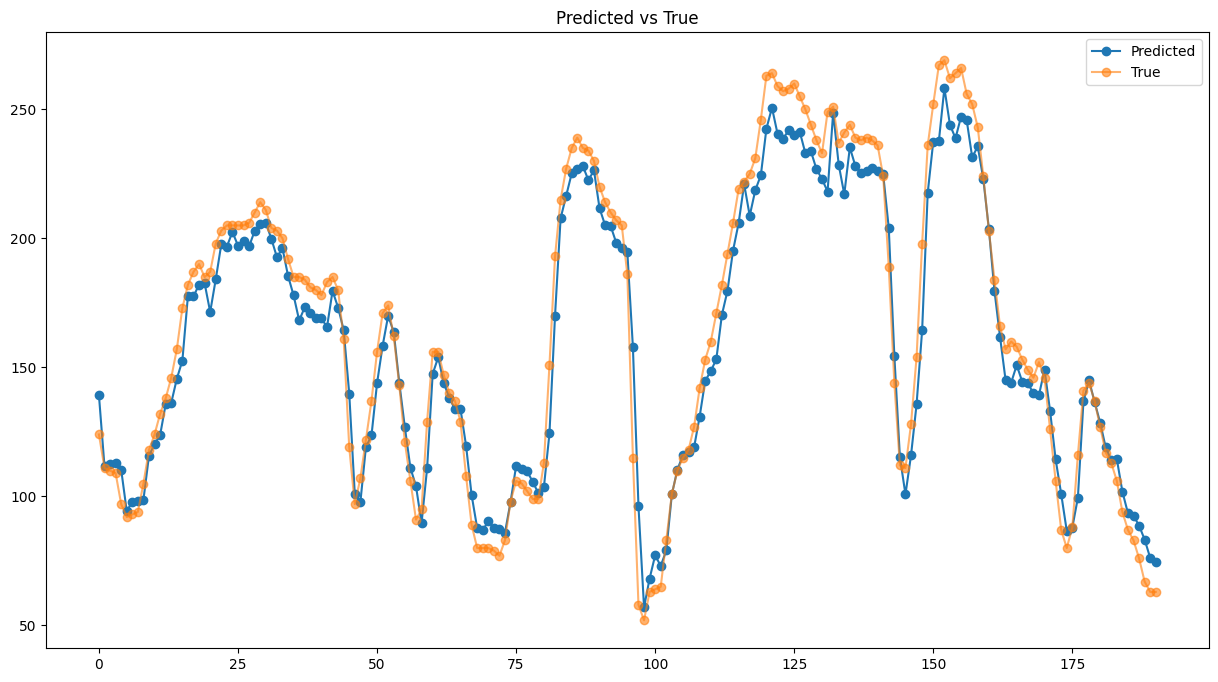

{'mae': 9.687158514691896,
 'mse': 11.969360977180477,
 'rmse': 143.2656022020508}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  139.185791
2023-01-01 00:15:00   111.0  111.629608
2023-01-01 00:30:00   110.0  112.645081
2023-01-01 00:45:00   109.0  112.872467
2023-01-01 01:00:00    97.0  110.362930
...                     ...         ...
2023-01-02 22:30:00    83.0   92.513634
2023-01-02 22:45:00    76.0   88.689438
2023-01-02 23:00:00    67.0   83.297104
2023-01-02 23:15:00    63.0   76.168655
2023-01-02 23:30:00    63.0   74.530251

[191 rows x 2 columns]

AP, BE, EP: (0.9736842105263158, 0.005263157894736842, 0.021052631578947368)


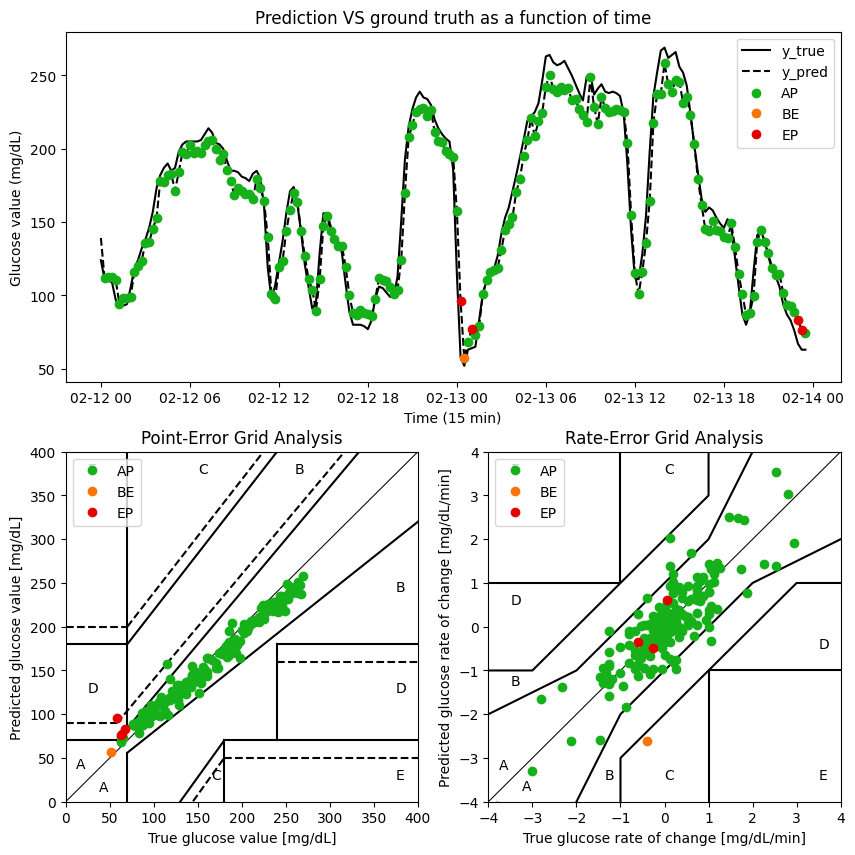

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 6ms/step


Glucose level Predict  Glucose level True
0               0.357349            0.373913
1               0.365178            0.400000
2               0.399975            0.404348
3               0.368451            0.406522
4               0.390059            0.397826

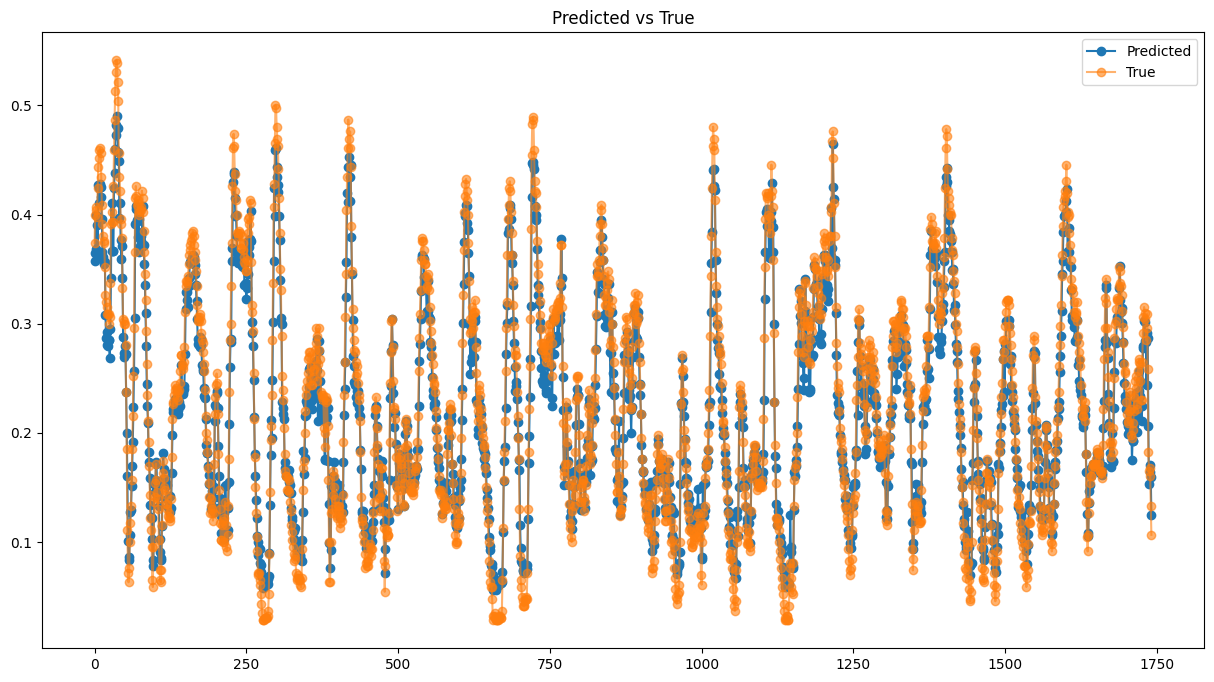

{'mae': 0.016987638076384474,
 'mse': 0.020466853864015328,
 'rmse': 0.00041889210709095923}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

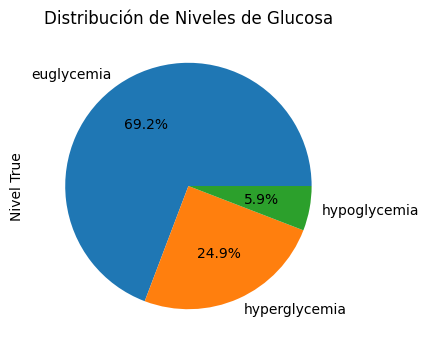

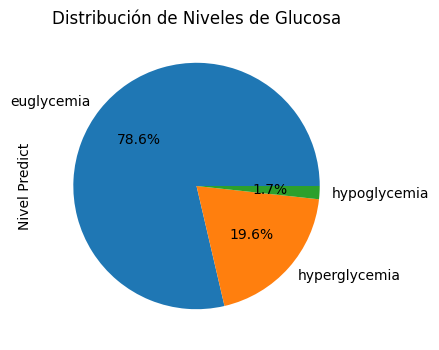

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             204.380615  hyperglycemia
1               224.0  hyperglycemia             207.982117  hyperglycemia
2               226.0  hyperglycemia             223.988586  hyperglycemia
3               227.0  hyperglycemia             209.487488  hyperglycemia
4               223.0  hyperglycemia             219.427002  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


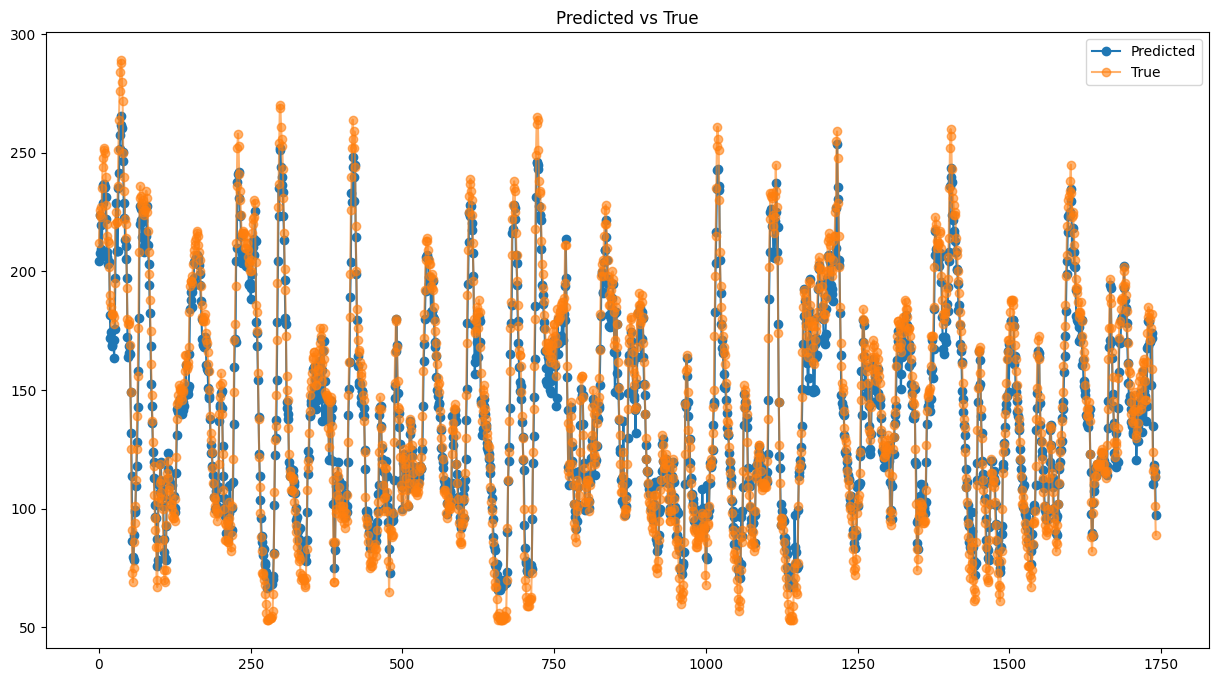

{'mae': 7.814311430821964, 'mse': 9.41475073651924, 'rmse': 88.63753143078956}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  204.380615
2023-01-01 00:15:00   224.0  207.982117
2023-01-01 00:30:00   226.0  223.988586
2023-01-01 00:45:00   227.0  209.487488
2023-01-01 01:00:00   223.0  219.427002
...                     ...         ...
2023-01-19 02:15:00   116.0  110.513878
2023-01-19 02:30:00   117.0  118.539299
2023-01-19 02:45:00   114.0  115.623940
2023-01-19 03:00:00   101.0  113.553345
2023-01-19 03:15:00    89.0   97.156685

[1742 rows x 2 columns]

AP, BE, EP: (0.9787478460654796, 0.0022975301550832855, 0.018954623779437105)


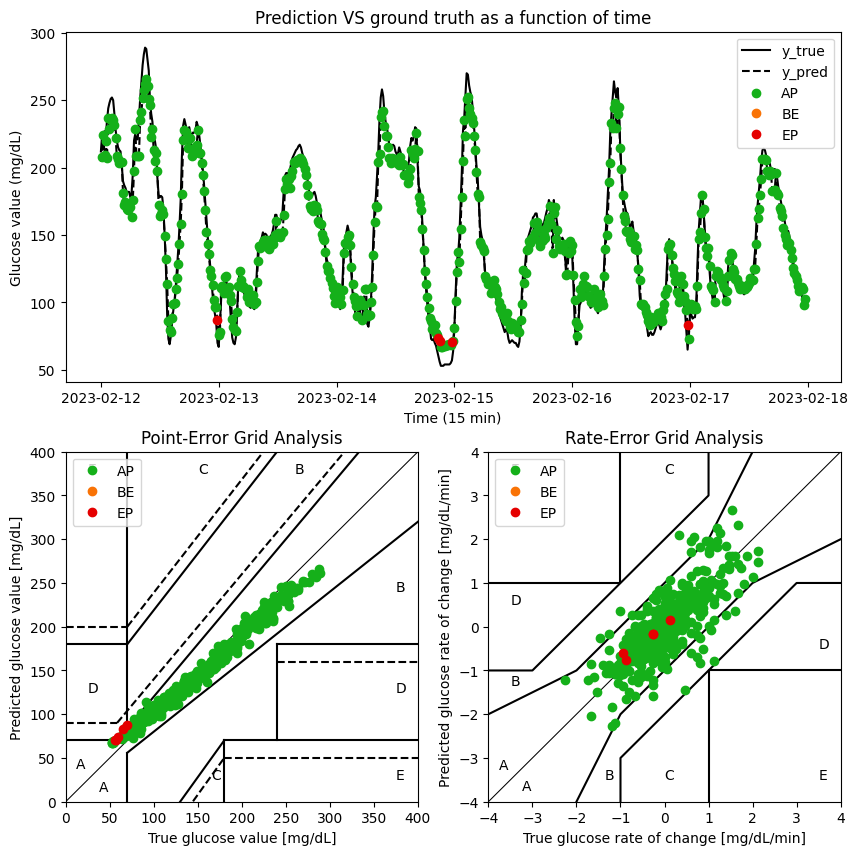

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 6ms/step


Glucose level Predict  Glucose level True
0               0.241707            0.261858
1               0.224266            0.229051
2               0.198840            0.196245
3               0.171074            0.163439
4               0.153105            0.130632

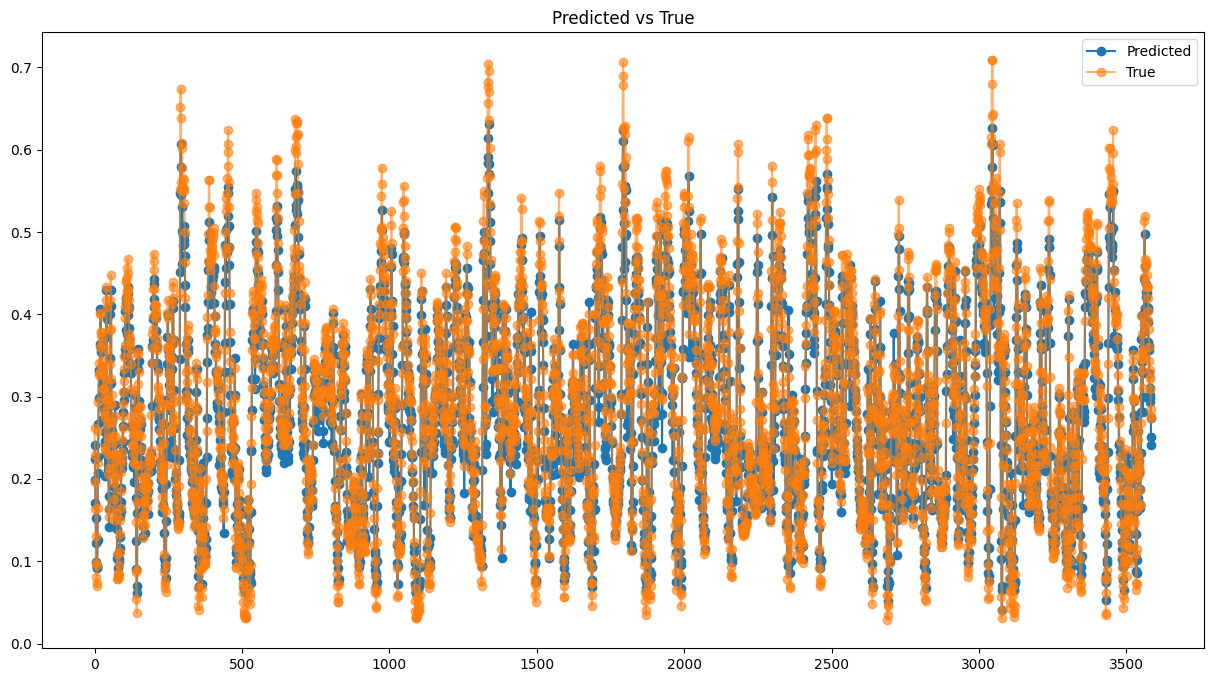

{'mae': 0.02400249697201091,
 'mse': 0.030679951583764468,
 'rmse': 0.000941259429182132}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

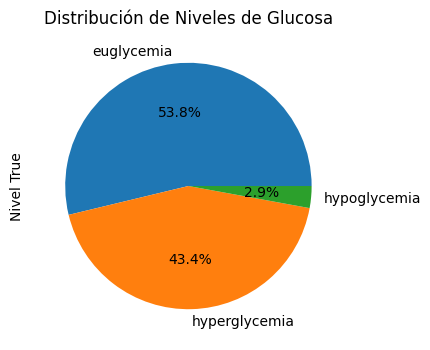

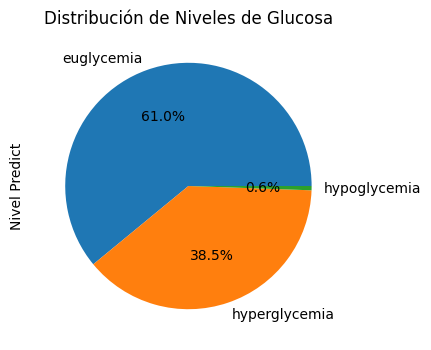

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0          160.454545  euglycemia             151.185196    euglycemia
1          145.363636  euglycemia             143.162125    euglycemia
2          130.272727  euglycemia             131.466629    euglycemia
3          115.181818  euglycemia             118.694214    euglycemia
4          100.090909  euglycemia             110.428352    euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


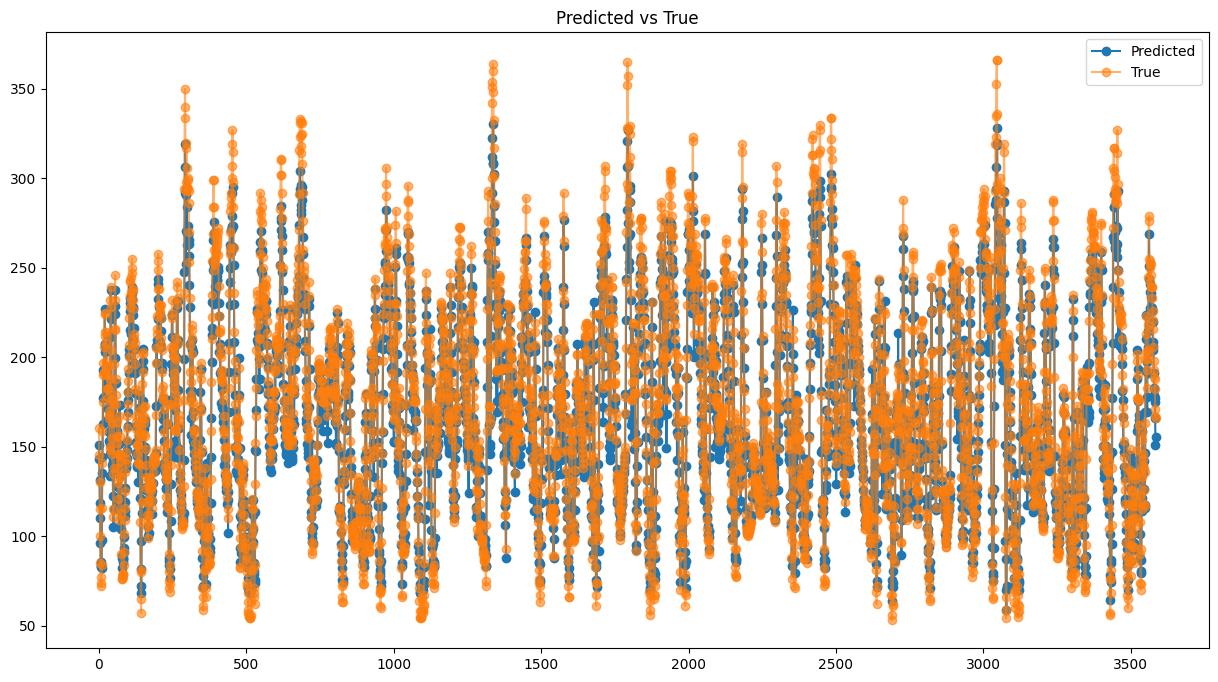

{'mae': 11.04114765233706,
 'mse': 14.11277757613614,
 'rmse': 199.17049091349102}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  151.185196
2023-01-01 00:15:00  145.363636  143.162125
2023-01-01 00:30:00  130.272727  131.466629
2023-01-01 00:45:00  115.181818  118.694214
2023-01-01 01:00:00  100.090909  110.428352
...                         ...         ...
2023-02-07 07:15:00  188.000000  177.463867
2023-02-07 07:30:00  182.000000  175.257980
2023-02-07 07:45:00  171.000000  166.322266
2023-02-07 08:00:00  167.000000  150.924225
2023-02-07 08:15:00  166.000000  155.340775

[3586 rows x 2 columns]

AP, BE, EP: (0.9682008368200837, 0.015620641562064157, 0.016178521617852163)


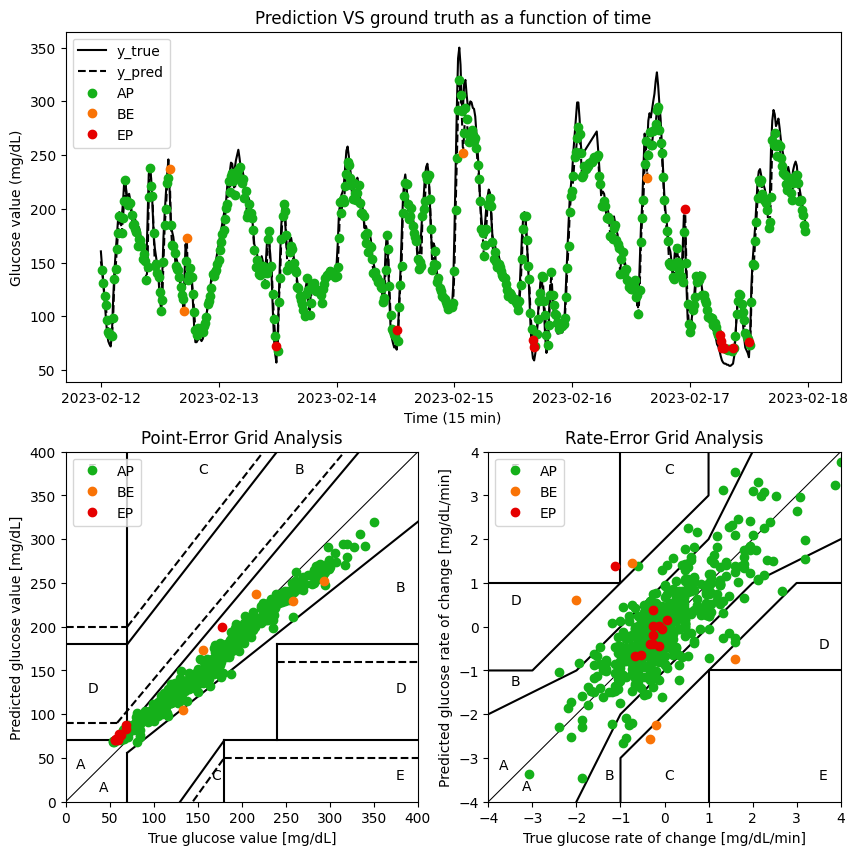

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 1s 6ms/step


Glucose level Predict  Glucose level True
0               0.488029            0.534783
1               0.474836            0.500000
2               0.428970            0.484783
3               0.442845            0.463043
4               0.410338            0.428261

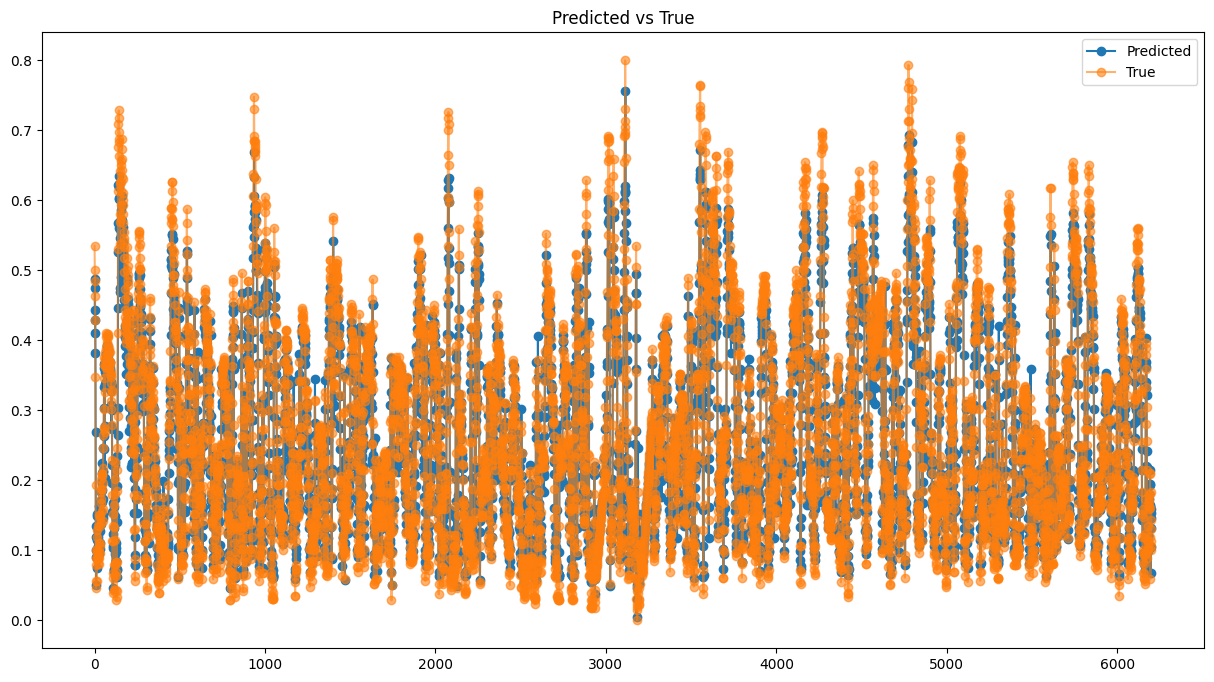

{'mae': 0.02578099364843041,
 'mse': 0.034190137075018855,
 'rmse': 0.0011689654732085788}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

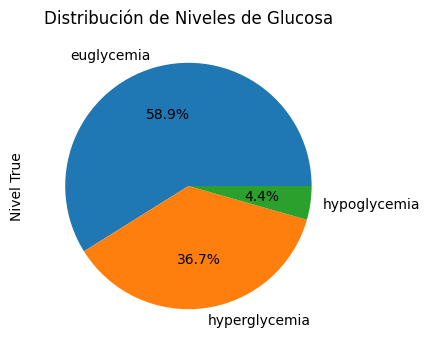

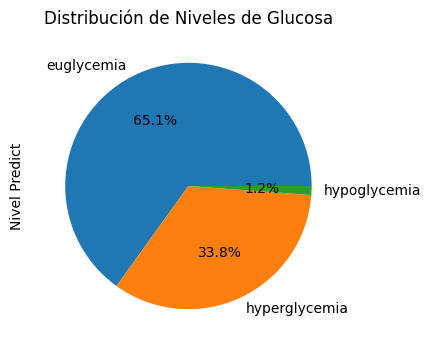

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             264.493408  hyperglycemia
1               270.0  hyperglycemia             258.424469  hyperglycemia
2               263.0  hyperglycemia             237.326096  hyperglycemia
3               253.0  hyperglycemia             243.708496  hyperglycemia
4               237.0  hyperglycemia             228.755447  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


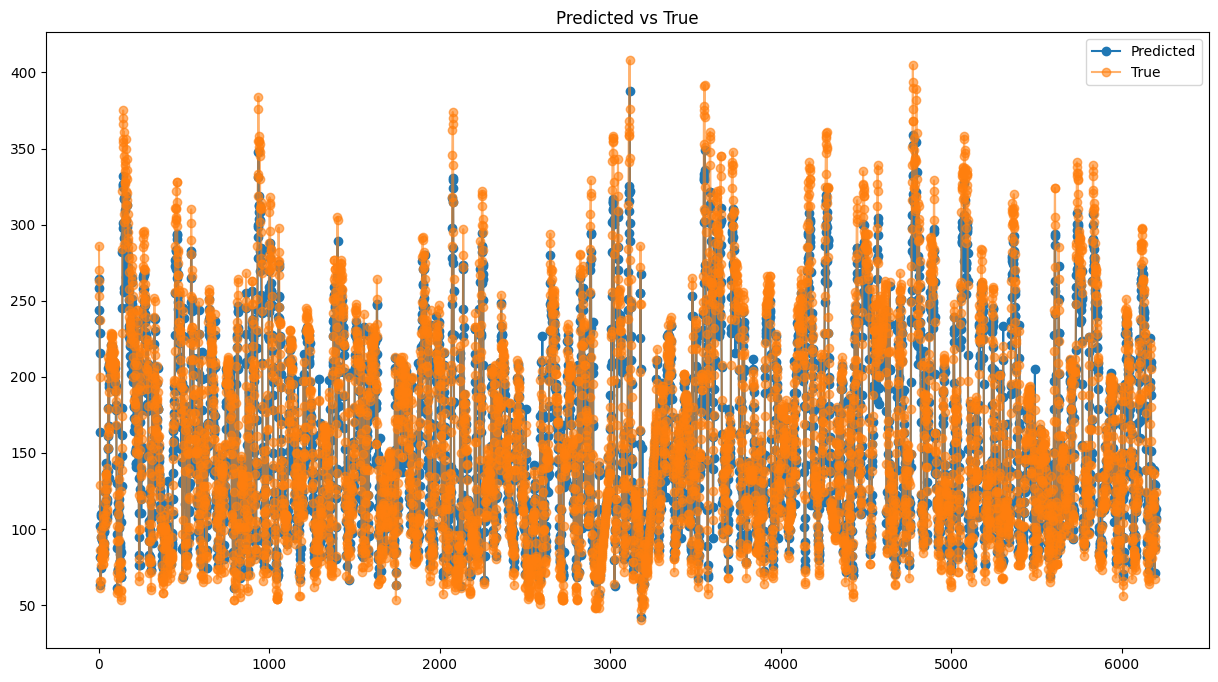

{'mae': 11.859256578900446,
 'mse': 15.727463674216851,
 'rmse': 247.3531136238106}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  264.493408
2023-01-01 00:15:00   270.0  258.424469
2023-01-01 00:30:00   263.0  237.326096
2023-01-01 00:45:00   253.0  243.708496
2023-01-01 01:00:00   237.0  228.755447
...                     ...         ...
2023-03-06 13:00:00   100.0  110.212036
2023-03-06 13:15:00    89.0  100.850182
2023-03-06 13:30:00    92.0   88.285042
2023-03-06 13:45:00   106.0  107.386963
2023-03-06 14:00:00   124.0  113.393349

[6201 rows x 2 columns]

AP, BE, EP: (0.9603225806451613, 0.021451612903225805, 0.018225806451612904)


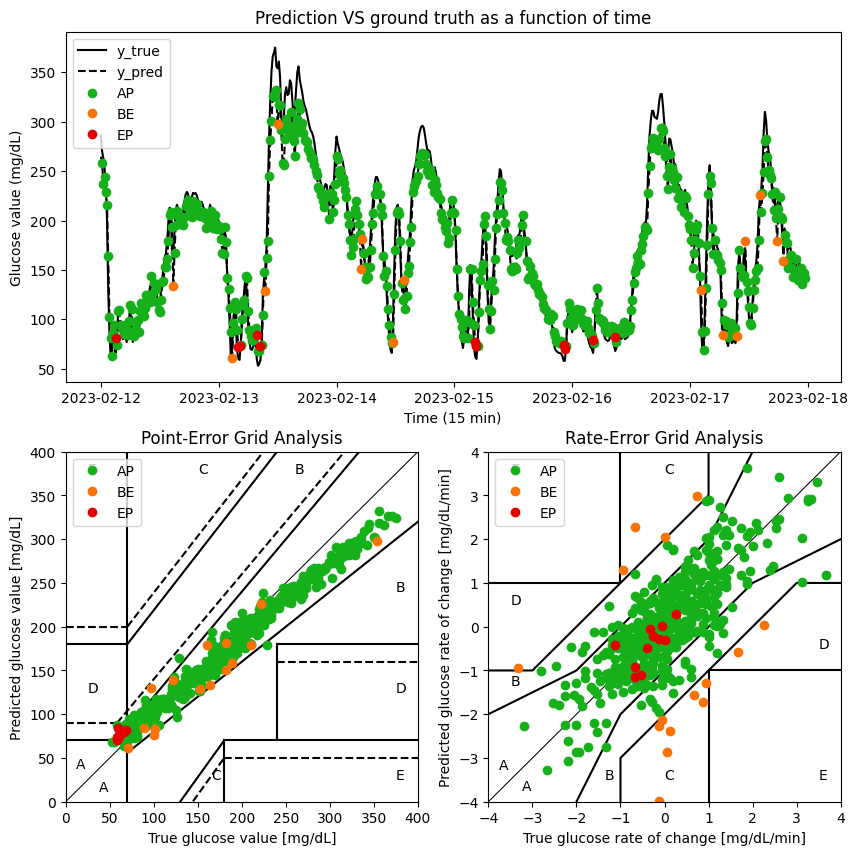

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)